In [26]:
import matplotlib.pyplot as plt
import pandas as pd

import sys, os
sys.path.append(os.path.expanduser('.../threedhst'))
import threedhst.eazyPy as eazy

## For Hubble Deep Field North (Default)

σ_NMAD = nan, Outlier fraction = 90.16%


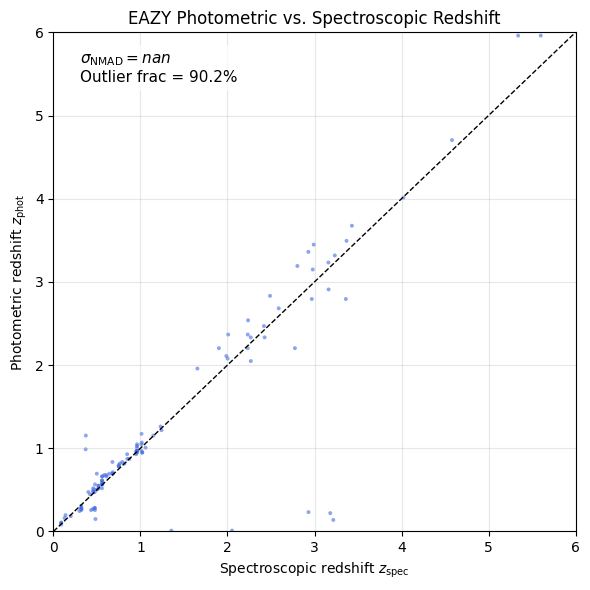

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table


def plot_zphot_zspec(zout_path, save_as='zphot_zspec.png', zmax=6, outlier_thresh=0.15):
    """
    Create a z_phot vs z_spec diagnostic plot similar to threedhst.eazyPy.zPhot_zSpec,
    including σ_NMAD and outlier fraction.

    Parameters
    ----------
    zout_path : str
        Path to the EAZY output file (photz.zout).
    save_as : str, optional
        Output filename for the plot (default: 'zphot_zspec.png').
    zmax : float, optional
        Maximum redshift for axes (default: 6).
    outlier_thresh : float, optional
        |Δz|/(1+z_spec) threshold for outliers (default: 0.15).
    """
    # --- Load EAZY output
    zout = Table.read(zout_path, format='ascii')

    # --- Identify columns automatically
    colnames = [c.lower() for c in zout.colnames]
    if 'z_spec' in colnames:
        zspec_col = zout.colnames[colnames.index('z_spec')]
    elif 'zspec' in colnames:
        zspec_col = zout.colnames[colnames.index('zspec')]
    else:
        raise ValueError("No spectroscopic redshift column found in .zout file.")

    if 'z_a' in colnames:
        zphot_col = zout.colnames[colnames.index('z_a')]
    elif 'z_phot' in colnames:
        zphot_col = zout.colnames[colnames.index('z_phot')]
    else:
        raise ValueError("No photometric redshift column (z_a / z_phot) found in .zout file.")

    # --- Extract arrays and clean NaNs
    zspec = np.array(zout[zspec_col])
    zphot = np.array(zout[zphot_col])
    mask = np.isfinite(zspec) & np.isfinite(zphot)
    zspec, zphot = zspec[mask], zphot[mask]

    # --- Compute scatter metrics
    dz = (zphot - zspec) / (1 + zspec)
    sigma_nmad = 1.48 * np.median(np.abs(dz - np.median(dz)))
    outlier_frac = np.mean(np.abs(dz) > outlier_thresh)

    # --- Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(zspec, zphot, s=8, alpha=0.6, color='royalblue', edgecolor='none', label='Data')
    plt.plot([0, zmax], [0, zmax], 'k--', lw=1, label='1:1')
    plt.xlabel(r'Spectroscopic redshift $z_{\rm spec}$')
    plt.ylabel(r'Photometric redshift $z_{\rm phot}$')
    plt.xlim(0, zmax)
    plt.ylim(0, zmax)
    plt.grid(alpha=0.3)

    # --- Annotate performance
    txt = (rf"$\sigma_{{\rm NMAD}} = {sigma_nmad:.3f}$" + "\n" +
           rf"Outlier frac = {outlier_frac*100:.1f}%")
    plt.text(0.05*zmax, 0.9*zmax, txt, fontsize=11, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.title('EAZY Photometric vs. Spectroscopic Redshift')
    plt.tight_layout()
    # plt.savefig(save_as, dpi=150)
    # plt.close()

    # print(f"✅ Plot saved to {save_as}")
    print(f"σ_NMAD = {sigma_nmad:.4f}, Outlier fraction = {outlier_frac*100:.2f}%")


plot_zphot_zspec('../outputs/OUTPUT_HDF-N/photz.zout', save_as='zphot_zspec.png', zmax=6)

## For JWST GOODS-N

In [57]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import astropy.io.fits as pyfits
import grizli
import grizli.catalog
from grizli import utils

import eazy

print(f'grizli version: {grizli.__version__}')
print(f'eazy-py version: {eazy.__version__}')

Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git
grizli version: 1.13.2
eazy-py version: 0.8.5


In [61]:
field = 'gds-grizli-v7.0'

url_path = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7'

phot = utils.read_catalog(f'{url_path}/{field}_phot.fits')
phot

id,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2_image,y2_image,xy_image,errx2,erry2,errxy,a_image,b_image,theta_image,cxx_image,cyy_image,cxy_image,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag,x_image,y_image,number,ra,dec,x_world,y_world,flux_iso,fluxerr_iso,area_iso,mag_iso,kron_radius,kron_rcirc,flux_auto,fluxerr_auto,bkg_auto,flag_auto,area_auto,flux_radius_flag,flux_radius_20,flux_radius,flux_radius_90,tot_corr,mag_auto,magerr_auto,flux_aper_0,fluxerr_aper_0,flag_aper_0,bkg_aper_0,mask_aper_0,flux_aper_1,fluxerr_aper_1,flag_aper_1,bkg_aper_1,mask_aper_1,flux_aper_2,fluxerr_aper_2,flag_aper_2,bkg_aper_2,mask_aper_2,flux_aper_3,fluxerr_aper_3,flag_aper_3,bkg_aper_3,mask_aper_3,clearp-f430m_flux_aper_0,clearp-f430m_fluxerr_aper_0,clearp-f430m_flag_aper_0,clearp-f430m_bkg_aper_0,clearp-f430m_mask_aper_0,clearp-f430m_flux_aper_1,clearp-f430m_fluxerr_aper_1,clearp-f430m_flag_aper_1,clearp-f430m_bkg_aper_1,clearp-f430m_mask_aper_1,clearp-f430m_flux_aper_2,clearp-f430m_fluxerr_aper_2,clearp-f430m_flag_aper_2,clearp-f430m_bkg_aper_2,clearp-f430m_mask_aper_2,clearp-f430m_flux_aper_3,clearp-f430m_fluxerr_aper_3,clearp-f430m_flag_aper_3,clearp-f430m_bkg_aper_3,clearp-f430m_mask_aper_3,clearp-f430m_tot_corr,clearp-f480m_flux_aper_0,clearp-f480m_fluxerr_aper_0,clearp-f480m_flag_aper_0,clearp-f480m_bkg_aper_0,clearp-f480m_mask_aper_0,clearp-f480m_flux_aper_1,clearp-f480m_fluxerr_aper_1,clearp-f480m_flag_aper_1,clearp-f480m_bkg_aper_1,clearp-f480m_mask_aper_1,clearp-f480m_flux_aper_2,clearp-f480m_fluxerr_aper_2,clearp-f480m_flag_aper_2,clearp-f480m_bkg_aper_2,clearp-f480m_mask_aper_2,clearp-f480m_flux_aper_3,clearp-f480m_fluxerr_aper_3,clearp-f480m_flag_aper_3,clearp-f480m_bkg_aper_3,clearp-f480m_mask_aper_3,clearp-f480m_tot_corr,f090w-clear_flux_aper_0,f090w-clear_fluxerr_aper_0,f090w-clear_flag_aper_0,f090w-clear_bkg_aper_0,f090w-clear_mask_aper_0,f090w-clear_flux_aper_1,f090w-clear_fluxerr_aper_1,f090w-clear_flag_aper_1,f090w-clear_bkg_aper_1,f090w-clear_mask_aper_1,f090w-clear_flux_aper_2,f090w-clear_fluxerr_aper_2,f090w-clear_flag_aper_2,f090w-clear_bkg_aper_2,f090w-clear_mask_aper_2,f090w-clear_flux_aper_3,f090w-clear_fluxerr_aper_3,f090w-clear_flag_aper_3,f090w-clear_bkg_aper_3,f090w-clear_mask_aper_3,f090w-clear_tot_corr,f105w_flux_aper_0,f105w_fluxerr_aper_0,f105w_flag_aper_0,f105w_bkg_aper_0,f105w_mask_aper_0,f105w_flux_aper_1,f105w_fluxerr_aper_1,f105w_flag_aper_1,f105w_bkg_aper_1,f105w_mask_aper_1,f105w_flux_aper_2,f105w_fluxerr_aper_2,f105w_flag_aper_2,f105w_bkg_aper_2,f105w_mask_aper_2,f105w_flux_aper_3,f105w_fluxerr_aper_3,f105w_flag_aper_3,f105w_bkg_aper_3,f105w_mask_aper_3,f105w_tot_corr,f110w_flux_aper_0,f110w_fluxerr_aper_0,f110w_flag_aper_0,f110w_bkg_aper_0,f110w_mask_aper_0,f110w_flux_aper_1,f110w_fluxerr_aper_1,f110w_flag_aper_1,f110w_bkg_aper_1,f110w_mask_aper_1,f110w_flux_aper_2,f110w_fluxerr_aper_2,f110w_flag_aper_2,f110w_bkg_aper_2,f110w_mask_aper_2,f110w_flux_aper_3,f110w_fluxerr_aper_3,f110w_flag_aper_3,f110w_bkg_aper_3,f110w_mask_aper_3,f110w_tot_corr,f115w-clear_flux_aper_0,f115w-clear_fluxerr_aper_0,f115w-clear_flag_aper_0,f115w-clear_bkg_aper_0,f115w-clear_mask_aper_0,f115w-clear_flux_aper_1,f115w-clear_fluxerr_aper_1,f115w-clear_flag_aper_1,f115w-clear_bkg_aper_1,f115w-clear_mask_aper_1,f115w-clear_flux_aper_2,f115w-clear_fluxerr_aper_2,f115w-clear_flag_aper_2,f115w-clear_bkg_aper_2,f115w-clear_mask_aper_2,f115w-clear_flux_aper_3,f115w-clear_fluxerr_aper_3,f115w-clear_flag_aper_3,f115w-clear_bkg_aper_3,f115w-clear_mask_aper_3,f115w-clear_tot_corr,f115wn-clear_flux_aper_0,f115wn-clear_fluxerr_aper_0,f115wn-clear_flag_aper_0,f115wn-clear_bkg_aper_0,f115wn-clear_mask_aper_0,f115wn-clear_flux_aper_1,f115wn-clear_fluxerr_aper_1,f115wn-clear_flag_aper_1,f115wn-clear_bkg_aper_1,f115wn-clear_mask_aper_1,f115wn-clear_flux_aper_2,f115wn-clear_fluxerr_aper_2,f115wn-clear_flag_aper_2,f115wn-clear_bkg_aper_2,f115wn-clear_mask_aper_2,f115wn-clear_flux_aper_3,f115wn-clear_fluxerr_aper_3,f115wn-clear_flag_aper_3,

## For JWST GOODS-S

## For JWST CEERS